<a href="https://colab.research.google.com/github/Cknowles11/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/Copy_of_LS_DS_133_High_Dimensional_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

In [27]:
v1 = [5,5]
v2 = [-4,-5]

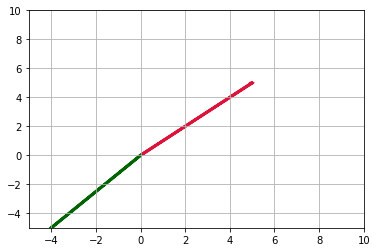

In [28]:
fig, ax = plt.subplots()
ax.grid()
plt.xlim(-5,10)
plt.ylim(-5,10)
for color, vector in[('crimson', v1 ),('darkgreen', v2 )]:
  plt.arrow(0,0,
          vector[0],
          vector[1], 
          head_width = .02,
          linewidth = 3,
          color = color);

In [29]:
v3 = [2,5]
v4 = [4,5]

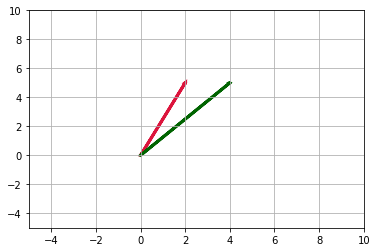

In [30]:
fig, ax = plt.subplots()
ax.grid()
plt.xlim(-5,10)
plt.ylim(-5,10)
for color, vector in[('crimson', v3),('darkgreen', v4)]:
  plt.arrow(0,0,
          vector[0],
          vector[1], 
          head_width = .02,
          linewidth = 3,
          color = color);

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

If the vertical line passes through more than one point in the graph, it means that there is a relation between an input and multiple outputs therefore it is not a function.

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

In [31]:
#Relation 2 is the only fucntion because it is the only relation that has one input to one output.

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

In [32]:
#Function m input dimensionality is R3 and the output is R3 as well
#Function n input dimensionality is R4 and the output is R2

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

In [33]:
def f(vect):
  x1 = vect[0][0]
  x2 = vect[1][0]
  row1 = np.array([x1 + 3*x2])
  row2 = np.array([2*x2 - x1])
  output_vector = np.array([row1, row2])
  return output_vector

In [34]:
i_hat = np.array([[1],[0]])
a = f(i_hat)
a

array([[ 1],
       [-1]])

In [35]:
p_hat = np.array([[0], [1]])
b = f(p_hat)
b

array([[3],
       [2]])

In [36]:
T = np.column_stack([a,b])
T

array([[ 1,  3],
       [-1,  2]])

In [37]:
pd.DataFrame(T)

,0,1
0,1,3
1,-1,2


## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [38]:
input_vector = np.array([[3],[4]])
f(input_vector)

array([[15],
       [ 5]])

In [39]:
output_vector = np.matmul(T,input_vector)
output_vector

array([[15],
       [ 5]])

# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

In [40]:
#An eigenvector is any vector that doesn't change its orientation during a transformation but may still be scaled.
#An eigenvalue is the scalar that scales the eigenvector.

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

In [41]:
#Data with too many dimensions have a lot of features that makes it difficult to work with. There is also increased redundancy within your data set.

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

In [41]:
#You should have 5x the amount of observations to parameters.

# Principal Component Analysis

## 7.1 Code for loading and cleaning the 2013 national dataset from the [Housing Affordability Data System (HADS)](https://www.huduser.gov/portal/datasets/hads/hads.html) --housing data, can be found below. 

## Perform PCA on the processed dataset `national_processed` (Make sure you standardize your data!) and then make a scatterplot of PC1 against PC2. Some of our discussion and work around PCA with this dataset will continue during tomorrow's lecture and assignment.

Not only does this dataset have decent amount columns to begin with (99), but in preparing the data for PCA we have also [one-hot-encoded](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f#targetText=One%20hot%20encoding%20is%20a,the%20entry%20in%20the%20dataset.) all of the categorical variables. This has the effect of creating a new column for each individual category of each categorical variable. After processing this dataset has 64738 columns. --Das a lot of columns.

Don't worry too much about the mechanics of one-hot encoding right now, you will learn and experiment with a whole bunch of categorical encoding approaches in unit 2. 

The code below will read in the dataset and perform the one-hot encoding of the categorical variables. Start adding your PCA code at the bottom of the provided code.

In [42]:
from urllib.request import urlopen
from zipfile import ZipFile
from io import BytesIO
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read Natinal Data 
national_url = 'https://www.huduser.gov/portal/datasets/hads/hads2013n_ASCII.zip'
national_file = 'thads2013n.txt'

if os.path.exists(national_file):
    national = pd.read_csv(national_file)
else: 
    z_national = urlopen(national_url)
    zip_national = ZipFile(BytesIO(z_national.read())).extract(national_file)
    national = pd.read_csv(zip_national)

print(national.shape)
national.head()

(64535, 99)


,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,BEDRMS,BUILT,STATUS,TYPE,VALUE,VACANCY,TENURE,NUNITS,ROOMS,WEIGHT,PER,ZINC2,ZADEQ,ZSMHC,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,TOTSAL,ASSISTED,GLMED,GL30,GL50,GL80,APLMED,ABL30,...,COST08RELPOVCAT,COST08RELFMRPCT,COST08RELFMRCAT,COST12RELAMIPCT,COST12RELAMICAT,COST12RELPOVPCT,COST12RELPOVCAT,COST12RELFMRPCT,COST12RELFMRCAT,COSTMedRELAMIPCT,COSTMedRELAMICAT,COSTMedRELPOVPCT,COSTMedRELPOVCAT,COSTMedRELFMRPCT,COSTMedRELFMRCAT,FMTZADEQ,FMTMETRO3,FMTBUILT,FMTSTRUCTURETYPE,FMTBEDRMS,FMTOWNRENT,FMTCOST06RELPOVCAT,FMTCOST08RELPOVCAT,FMTCOST12RELPOVCAT,FMTCOSTMEDRELPOVCAT,FMTINCRELPOVCAT,FMTCOST06RELFMRCAT,FMTCOST08RELFMRCAT,FMTCOST12RELFMRCAT,FMTCOSTMEDRELFMRCAT,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
0,'100003130103',82,'3','1',73738,956,15738,26213,40322,11067,2,2006,'1',1,40000,-6,'1',1,6,3117.394239,1,18021,'1',533,1,'1',169.000000,213.750000,648.588189,803.050535,696.905247,615.156712,0,-9,73738,15738,26213,40322,51616.6,20234.571429,...,4,72.898038,2,48.402635,2,290.250487,4,84.001102,2,37.077624,2,222.339102,4,64.346936,2,'1 Adequate','-5','2000-2009','1 Single Family','2 2BR','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','2 50.1 - 100% FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','1 LTE 50% FMR','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','.','2 30% to 50%','-5','-5'
1,'100006110249',50,'5','3',55846,1100,17165,28604,45744,24218,4,1980,'1',1,130000,-6,'1',1,6,2150.725544,4,122961,'1',487,1,'1',245.333333,58.333333,1167.640781,1669.643405,1324.671218,1058.988479,123000,-9,55846,17165,28604,45744,55846.0,19911.400000,...,4,120.424656,3,103.094063,6,275.768999,4,151.785764,3,65.388468,4,174.909320,3,96.271680,2,'1 Adequate','-5','1980-1989','1 Single Family','4 4BR+','1 Owner','3 150-200% Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','4 200%+ Poverty','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','3 GT FMR','4 60 - 80% AMI','4 60 - 80% AMI','6 100 - 120% AMI','4 60 - 80% AMI','7 120% AMI +','.','1 Less than 30%','-5','-5'
2,'100006370140',53,'5','3',55846,1100,13750,22897,36614,15470,4,1985,'1',1,150000,-6,'1',1,7,2213.789404,2,27974,'1',1405,1,'1',159.000000,37.500000,1193.393209,1772.627006,1374.582175,1068.025168,28000,-9,55846,13750,22897,36614,44676.8,19937.500000,...,4,124.962016,3,109.452905,6,458.339239,4,161.147910,3,65.946449,4,276.153890,4,97.093197,2,'1 Adequate','-5','1980-1989','1 Single Family','4 4BR+','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','4 60 - 80% AMI','5 80 - 100% AMI','6 100 - 120% AMI','4 60 - 80% AMI','4 60 - 80% AMI','.','3 50% or More','-5','-5'
3,'100006520140',67,'5','3',55846,949,13750,22897,36614,13964,3,1985,'1',1,200000,-6,'1',1,6,2364.585097,2,32220,'1',279,1,'1',179.000000,70.666667,1578.857612,2351.169341,1820.442900,1411.700224,0,-9,55846,13750,22897,36614,44676.8,17875.000000,...,4,191.827492,3,161.926709,7,673.494512,4,247.752301,3,97.224801,5,404.382763,4,148.756610,3,'1 Adequate','-5','1980-1989','1 Single Family','3 3BR','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 GT FMR','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','6 100 - 120% AMI','7 120% AMI +','7 120% AMI +','5 80 - 100% AMI','4 60 - 80% AMI','.','1 Less than 30%','-5','-5'
4,'100007130148',26,'1','3',60991,737,14801,24628,39421,15492,2,1980,'1',1,-6,-6,'2',100,4,2314.524902,2,96874,'1',759,5,'2',146.000000,12.500000,759.000000,759.000000,759.000000,759.000000,96900,0,60991,14801,24628,39421,48792.8,16651.125000,...,3,102.985075,3,55.308707,3,195.972115,3,102.985075,3,55.308707,3,195.972115,3,102.98

In [43]:
# Look at datatypes
# a lot of object datatypes even though they seem to be strings of numbers.
national.dtypes

CONTROL            object
AGE1                int64
METRO3             object
REGION             object
LMED                int64
                    ...  
FMTINCRELAMICAT    object
FMTASSISTED        object
FMTBURDEN          object
FMTREGION          object
FMTSTATUS          object
Length: 99, dtype: object

In [44]:
# check for null values
national.isnull().sum().any()

False

In [45]:
# check for number of categorical vs numeric columns
cat_cols = national.columns[national.dtypes=='object']
num_cols = national.columns[national.dtypes!='object']

print(f'{len(cat_cols)} categorical columns')
print(f'{len(num_cols)} numerical columns')

32 categorical columns
67 numerical columns


In [46]:
# We're making a copy of our data in case we mess something up.
national_processed = national.copy()

# Categorically Encode our Variables:
# They need to all be numeric before we do PCA.
# https://pbpython.com/categorical-encoding.html

# Cast categorical columns to "category" data type
national_processed[cat_cols] = national_processed[cat_cols].astype('category')

national_processed.dtypes

CONTROL            category
AGE1                  int64
METRO3             category
REGION             category
LMED                  int64
                     ...   
FMTINCRELAMICAT    category
FMTASSISTED        category
FMTBURDEN          category
FMTREGION          category
FMTSTATUS          category
Length: 99, dtype: object

In [64]:
# Replace all category cell values with their numeric category codes
for col in cat_cols:
  national_processed[col] = national_processed[col].cat.codes

print(national_processed.shape)
national_processed.head()

AttributeError: ignored

In [48]:
# Now we only ahve numeric columns (ints and floats)
national_processed.dtypes

CONTROL            int32
AGE1               int64
METRO3              int8
REGION              int8
LMED               int64
                   ...  
FMTINCRELAMICAT     int8
FMTASSISTED         int8
FMTBURDEN           int8
FMTREGION           int8
FMTSTATUS           int8
Length: 99, dtype: object

In [49]:
### Your Code Here
from sklearn.preprocessing import StandardScaler
feature_cols=national_processed.columns[1:]
feature_cols[:5]

Index(['AGE1', 'METRO3', 'REGION', 'LMED', 'FMR'], dtype='object')

In [50]:
x = national_processed.loc[:, feature_cols].values
x = StandardScaler().fit_transform(x) 

In [51]:
print('{:.2f}'.format(np.mean(x)))
print(np.std(x))

0.00
0.9948848769417227


In [65]:
normal_nat = pd.DataFrame(x,columns=feature_cols)
normal_nat.head(10)

,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,BEDRMS,BUILT,STATUS,TYPE,VALUE,VACANCY,TENURE,NUNITS,ROOMS,WEIGHT,PER,ZINC2,ZADEQ,ZSMHC,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,TOTSAL,ASSISTED,GLMED,GL30,GL50,GL80,APLMED,ABL30,ABL50,...,COST08RELPOVCAT,COST08RELFMRPCT,COST08RELFMRCAT,COST12RELAMIPCT,COST12RELAMICAT,COST12RELPOVPCT,COST12RELPOVCAT,COST12RELFMRPCT,COST12RELFMRCAT,COSTMedRELAMIPCT,COSTMedRELAMICAT,COSTMedRELPOVPCT,COSTMedRELPOVCAT,COSTMedRELFMRPCT,COSTMedRELFMRCAT,FMTZADEQ,FMTMETRO3,FMTBUILT,FMTSTRUCTURETYPE,FMTBEDRMS,FMTOWNRENT,FMTCOST06RELPOVCAT,FMTCOST08RELPOVCAT,FMTCOST12RELPOVCAT,FMTCOSTMEDRELPOVCAT,FMTINCRELPOVCAT,FMTCOST06RELFMRCAT,FMTCOST08RELFMRCAT,FMTCOST12RELFMRCAT,FMTCOSTMEDRELFMRCAT,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
0,1.488075,0.608784,-1.327872,0.454953,-0.528766,-0.444470,-0.445262,-0.553127,-0.681429,-0.603700,1.504196,-0.271749,-0.142292,-0.409728,-0.26814,-0.518234,-0.253701,0.193641,0.989256,-0.345248,-0.582421,-0.001189,-0.538157,-0.626460,-0.858681,-0.108318,1.002403,-0.524572,-0.489431,-0.511002,-0.535753,-0.693001,-0.774303,0.454953,-0.444470,-0.445262,-0.553127,-0.100276,-0.139349,-0.140598,...,0.448213,-0.508180,-0.588115,-0.524716,-1.139197,-0.294200,0.432580,-0.487463,-0.685212,-0.580668,-0.896546,-0.272848,0.472927,-0.526199,-0.452728,-0.001189,-0.706647,1.728565,-0.627170,-0.612264,-0.858681,0.676610,0.649838,0.615731,0.703541,0.071352,-0.518776,-0.588115,-0.685212,-0.452728,-1.091609,-0.956874,-1.028145,-1.139197,-0.896546,-0.779119,-0.709278,0.549473,-0.462107,0.0
1,0.088812,2.184270,0.576698,-0.991324,-0.163391,-0.123184,-0.122457,-0.043566,1.140132,1.224839,0.515773,-0.271749,-0.142292,-0.048319,-0.26814,-0.518234,-0.253701,0.193641,0.213178,0.823743,0.827974,-0.001189,-0.584987,-0.626460,-0.858681,0.478101,-0.065553,-0.214100,-0.155728,-0.190289,-0.235410,1.204959,-0.774303,-0.991324,-0.123184,-0.122457,-0.043566,0.108920,-0.207233,-0.206327,...,0.448213,-0.135192,0.796007,-0.102732,0.682587,-0.316521,0.432580,-0.084420,0.716067,-0.203481,0.115986,-0.399199,0.167739,-0.199905,-0.452728,-0.001189,-0.706647,0.467274,-0.627170,1.390040,-0.858681,-0.080937,0.649838,0.615731,-0.052382,0.778350,0.859820,0.796007,0.716067,-0.452728,0.926091,0.024966,-0.077478,0.682587,0.115986,1.171883,-0.709278,-0.544709,-0.462107,0.0
2,0.219993,2.184270,0.576698,-0.991324,-0.163391,-0.892063,-0.892949,-0.901606,-0.071564,1.224839,0.705854,-0.271749,-0.142292,0.031993,-0.26814,-0.518234,-0.253701,0.718708,0.263808,0.044416,-0.448652,-0.001189,0.349585,-0.626460,-0.858681,-0.185141,-0.208710,-0.198696,-0.116072,-0.164791,-0.229295,-0.260945,-0.774303,-0.991324,-0.892063,-0.892949,-0.901606,-0.443533,-0.201751,-0.203806,...,0.448213,-0.099583,0.796007,-0.053669,0.682587,-0.035118,0.432580,-0.028753,0.716067,-0.196046,0.115986,-0.129488,0.472927,-0.191508,-0.452728,-0.001189,-0.706647,0.467274,-0.627170,1.390040,-0.858681,0.676610,0.649838,0.615731,0.703541,0.071352,0.859820,0.796007,0.716067,-0.452728,-0.082759,0.024966,0.397856,0.682587,0.115986,0.001282,-0.709278,1.643655,-0.462107,0.0
3,0.832170,2.184270,0.576698,-0.991324,-0.546527,-0.892063,-0.892949,-0.901606,-0.280162,0.310570,0.705854,-0.271749,-0.142292,0.232776,-0.26814,-0.518234,-0.253701,0.193641,0.384872,0.044416,-0.391586,-0.001189,-0.796742,-0.626460,-0.858681,-0.031494,0.019197,0.031870,0.106710,0.062991,0.003272,-0.693001,-0.774303,-0.991324,-0.892063,-0.892949,-0.901606,-0.443533,-0.634993,-0.636447,...,0.448213,0.425176,0.796007,0.351204,1.138032,0.296510,0.432580,0.486190,0.716067,0.220677,0.622252,0.212108,0.472927,0.336529,0.923669,-0.001189,-0.706647,0.467274,-0.627170,0.388888,-0.858681,0.676610,0.649838,0.615731,0.703541,0.778350,0.859820,0.796007,0.716067,0.923669,-0.082759,1.006807,1.348523,1.138032,0.622252,0.001282,-0.709278,-0.544709,-0.462107,0.0
4,-0.960634,-0.966702,0.576698,-0.575

In [54]:
pca_nat = PCA(n_components=2)

In [55]:
pca_data = pca_nat.fit_transform(x)

In [57]:
df_final = pd.DataFrame(data = pca_data, columns = ['Component_1', 'Component_2'])
df_final.head(5)

,Component_1,Component_2
0,-2.607484,-1.380332
1,2.010313,-0.992019
2,1.184849,0.366219
3,2.791772,1.719967
4,-1.600407,-0.882243


In [58]:
1-sum(pca_nat.explained_variance_ratio_)

0.5101780795900035

In [66]:
df_final['CONTROL'] = national_processed['CONTROL']
df_final.head(10)

,Component_1,Component_2,CONTROL
0,-2.607484,-1.380332,0
1,2.010313,-0.992019,1
2,1.184849,0.366219,2
3,2.791772,1.719967,3
4,-1.600407,-0.882243,4
5,-2.966745,-0.301334,5
6,4.810802,0.871571,6
7,-0.755372,-0.971178,7
8,3.262088,0.923122,8
9,0.047459,0.508082,9


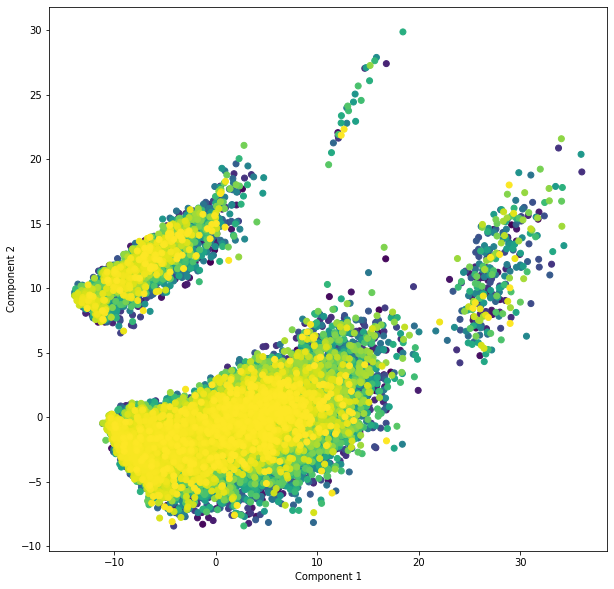

In [94]:
plt.figure(figsize=(10,10))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.scatter(x = df_final['Component_1'], y = df_final['Component_2'], c = df_final['CONTROL']);

# Stretch Goals

## 1) Perform further data exploration on the HADS national dataset (the version before we one-hot encoded it) Make scatterplots and see if you can see any resemblance between the original scatterplots and the plot of the principal components that you made in 7.1. 

(You may or may not not see very much resemblance depending on the variables you choose, and that's ok!)

## 2) Study "Scree Plots" and then try and make one for your PCA dataset. How many principal conponents do you need to retain in order for your PCs to contain 90% of the explained variance? 

We will present this topic formally at the beginning of tomorrow's lecture, so if you figure this stretch goal out, you're ahead of the game. 

## 3) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

Prioritize self-study over this stretch goal if you are not semi-comfortable with the topics of PCA, Eigenvalues, and Eigenvectors.

![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)